# Analysis of the covid cases and deaths over the countries

In [1]:
# Importing libs
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#################

# COVID

In [2]:
# Importing covid dataset
covid_dataset = pd.read_csv('covid19_dataset.csv')
covid_dataset.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [3]:
# Dataset exploration and cleaning : 
print('shape : ',covid_dataset.shape)

shape :  (266, 104)


In [4]:
# Basic statistics for the column :
covid_dataset.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.259359,22.432499,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,9582.033835,9865.063910,10179.481203,10506.875940,10826.203008,11102.887218,11360.176692,1.163550e+04,1.191693e+04,1.224378e+04
std,24.747943,70.478908,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,55192.088929,56941.164602,58758.271305,60812.226451,62832.838104,64533.887576,65963.984777,6.750782e+04,6.918917e+04,7.102980e+04
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,62.250000,67.000000,72.250000,72.250000,74.000000,74.250000,7.500000e+01,7.600000e+01,7.725000e+01
50%,23.488100,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,339.000000,342.500000,372.500000,403.000000,403.000000,423.000000,423.500000,4.335000e+02,4.555000e+02,4.665000e+02
75%,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1712.500000,1767.750000,1781.250000,1800.500000,1894.250000,1928.250000,1974.500000,2.020000e+03,2.047250e+03,2.105250e+03
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,811865.000000,840351.000000,869170.000000,905358.000000,938154.000000,965785.000000,988197.000000,1.012582e+06,1.039909e+06,1.069424e+06


In [5]:
# For the covid dataset : 
# as a timeserie, for each date we have the number of cases
    # Latitude and longitude not needed for the analyses => drop the columns
covid_dataset.drop(["Lat","Long"],axis=1,inplace=True)
    # some rows represent the state/province and not the country => sum the cases for each country and drop the state/province
covid_dataset_agg = covid_dataset.groupby("Country/Region").sum()
covid_dataset_agg.head(10)
# There is no lack of data in this data after deleting and aggregating

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
Argentina,0,0,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
Armenia,0,0,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
Australia,0,0,0,0,4,5,5,6,9,9,...,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766


In [6]:
covid_dataset_agg.head(15)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
Argentina,0,0,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
Armenia,0,0,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
Australia,0,0,0,0,4,5,5,6,9,9,...,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766


In [7]:
covid_dataset_agg.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,1.870000e+02,1.870000e+02,1.870000e+02
mean,2.967914,3.497326,5.032086,7.668449,11.326203,15.652406,29.828877,32.973262,44.032086,53.085561,...,13630.058824,14032.657754,14479.903743,14945.609626,15399.839572,15793.411765,16159.395722,1.655103e+04,1.695136e+04,1.741629e+04
std,40.071697,47.017656,67.271230,102.808451,151.725366,210.370186,402.833903,445.097602,595.295516,716.748552,...,65623.450171,67699.951451,69854.512469,72292.085088,74690.260370,76709.121347,78404.913349,8.023629e+04,8.223124e+04,8.441412e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,67.000000,70.000000,75.000000,79.000000,80.000000,81.000000,81.000000,8.100000e+01,9.300000e+01,9.750000e+01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,609.000000,634.000000,671.000000,681.000000,693.000000,696.000000,710.000000,7.120000e+02,7.290000e+02,7.460000e+02
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4081.500000,4242.500000,4422.500000,4785.000000,5070.000000,5397.500000,5708.500000,5.900000e+03,6.076000e+03,6.254500e+03
max,548.000000,643.000000,920.000000,1406.000000,2075.000000,2877.000000,5509.000000,6087.000000,8141.000000,9802.000000,...,811865.000000,840351.000000,869170.000000,905358.000000,938154.000000,965785.000000,988197.000000,1.012582e+06,1.039909e+06,1.069424e+06


In [8]:
# checking the 5 most countries affected by covid19 : 
# create a temp dataframe from covid_dataset aggregated
# Sort by the last column // because cases are cumulative and 4/30/20 is the last serie
covid_dataset_agg.sort_values(by=['4/30/20'],ascending=False,inplace=True)
covid_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,811865,840351,869170,905358,938154,965785,988197,1012582,1039909,1069424
Spain,0,0,0,0,0,0,0,0,0,0,...,204178,208389,213024,202990,205905,207634,209465,210773,212917,213435
Italy,0,0,0,0,0,0,0,0,0,2,...,183957,187327,189973,192994,195351,197675,199414,201505,203591,205463
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,130172,134638,139246,144640,149569,154037,158348,162350,166441,172481
France,0,0,2,3,3,3,4,5,5,5,...,158168,155980,158303,159952,161644,162220,165963,169053,166543,167299


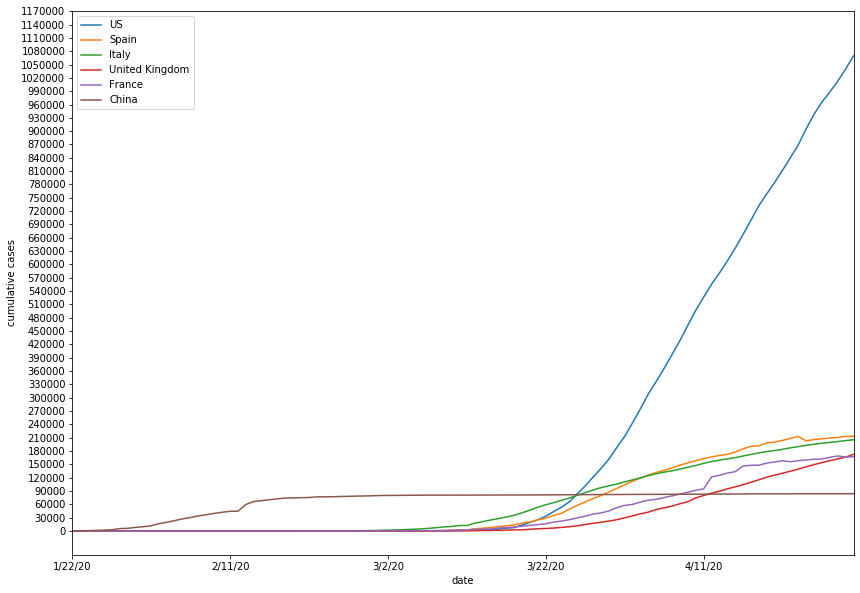

In [9]:
# Getting the 5 countries and plotting them
names = list(covid_dataset_agg.index[0:5])# getting the countries bcz it's considered as an index in this case
# we'll add China only to see the difference between 
names.append(covid_dataset_agg.index[10])
plt.figure(figsize=(14,10))
for e in range(len(names)):
    ax = covid_dataset_agg.loc[names[e]].plot()
ax.set_xlabel('date')
ax.set_ylabel('cumulative cases')
ax.set_yticks(np.arange(0,1200000,30000))
plt.legend(fontsize='medium')

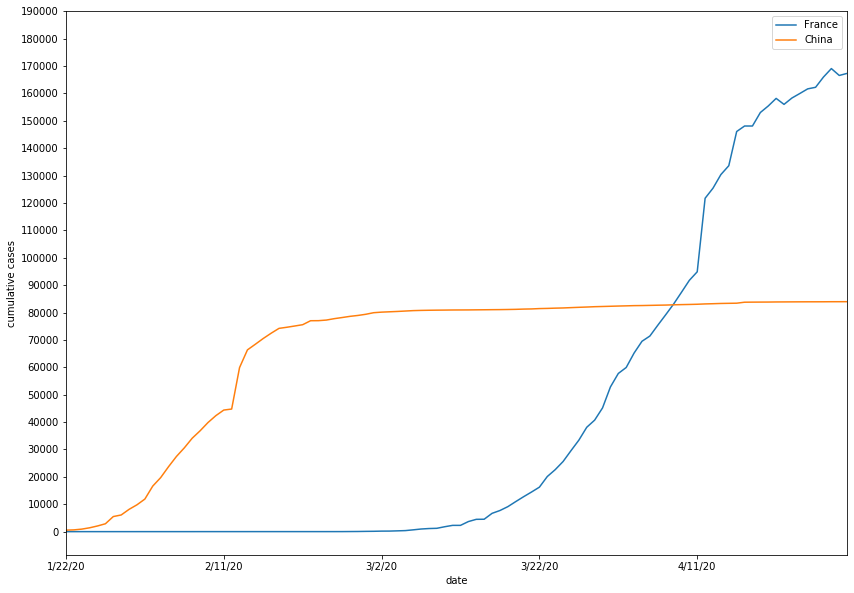

In [10]:
# plot only china and France to see the huge difference between the shape of the curves
plt.figure(figsize=(14,10))
for e in range(4,len(names)):
    ax = covid_dataset_agg.loc[names[e]].plot()
ax.set_xlabel('date')
ax.set_ylabel('cumulative cases')
ax.set_yticks(np.arange(0,200000,10000))
plt.legend(fontsize='medium')

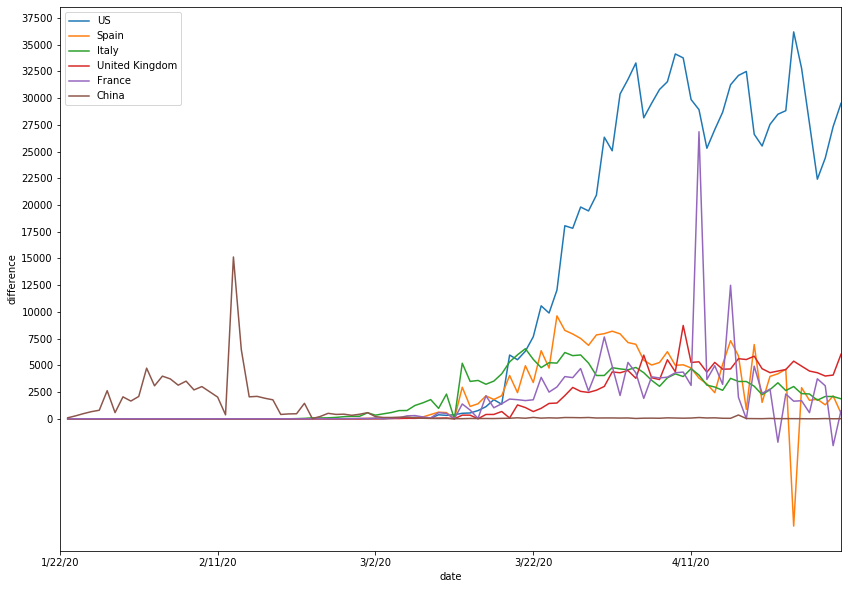

In [11]:
# Calculating the derivative of the curves : the change of infection rate day by day in a period - number of infections per day
# names : already have them in the last cell
plt.figure(figsize=(14,10))
for e in range(len(names)):
    ax = covid_dataset_agg.loc[names[e]].diff().plot()
ax.set_xlabel('date')
ax.set_ylabel('difference')
ax.set_yticks(np.arange(0,40000,2500))
plt.legend(fontsize='medium')

In [12]:
# Getting the maximum change : the maximum cases occured in one day for each country
max_diff = []
for e in range(len(names)):
    max_diff.append({'Country/Region':names[e],'max_change': covid_dataset_agg.loc[names[e]].diff().max()})
max_diff = pd.DataFrame(max_diff,columns=["Country/Region","max_change"])
max_diff

,Country/Region,max_change
0,US,36188.0
1,Spain,9630.0
2,Italy,6557.0
3,United Kingdom,8733.0
4,France,26849.0
5,China,15136.0


<BarContainer object of 6 artists>

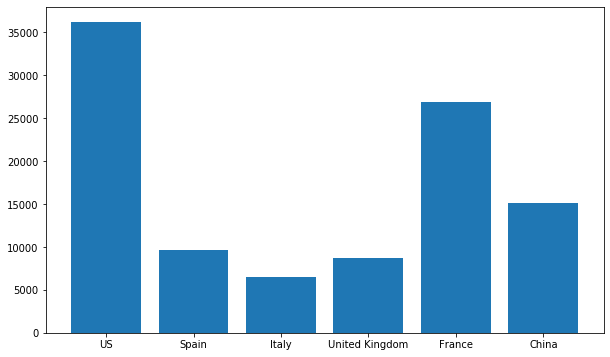

In [13]:
plt.figure(figsize=(10,6))
plt.bar(max_diff['Country/Region'], max_diff['max_change'])

In [14]:
# Doing it for all countries :
countries = list(covid_dataset_agg.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(covid_dataset_agg.loc[country].diff().max())
covid_dataset_agg['max_infection_rates'] = max_infection_rates # adding it to the dataframe

# Happiness report
## merge the two datasets and try to get useful conclusion and interpretation

In [15]:
# Importing worldwide happiness report dataset 
worldwide_happiness = pd.read_csv('worldwide_happiness_report.csv')
worldwide_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
# For the worldwide_happiness dataset : 
    # Useless columns : Overall rank, Score, Generosity, Perceptions of corruption
columns_to_drop = ['Overall rank','Score','Generosity','Perceptions of corruption']
worldwide_happiness.drop(columns_to_drop,axis=1 , inplace=True)
worldwide_happiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [17]:
# Changing the index of the dataset from the integers to the Country or region column in order to merge ( have an easy join)
worldwide_happiness.set_index(['Country or region'], inplace = True)
worldwide_happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [18]:
# Needed column from the covid dataset : max infection rate
# extracting it into a new dataframe : 
covid_merge = pd.DataFrame(covid_dataset_agg['max_infection_rates'])
covid_merge.head() # see the index

,max_infection_rates
Country/Region,
US,36188.0
Spain,9630.0
Italy,6557.0
United Kingdom,8733.0
France,26849.0


In [19]:
# Join the two datasets : covid and worldwide happiness
# Checking shapes before joining : 
print('shape of covid_merge : ', covid_merge.shape ,' shape if worldwide_happiness : ', worldwide_happiness.shape )

shape of covid_merge :  (187, 1)  shape if worldwide_happiness :  (156, 4)


In [20]:
# Different number of rows => perform an inner join 
merged_dataset = covid_merge.join(worldwide_happiness,how='inner')
merged_dataset.head()#Okay

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Spain,9630.0,1.286,1.484,1.062,0.362
Italy,6557.0,1.294,1.488,1.039,0.231
United Kingdom,8733.0,1.333,1.538,0.996,0.450
France,26849.0,1.324,1.472,1.045,0.436
Germany,6933.0,1.373,1.454,0.987,0.495


In [21]:
# New shape of the merged dataset :
merged_dataset.shape

(143, 5)

In [22]:
# Correlation between the different life factors and max_infection rate 
merged_dataset.corr() # Correlation matrix

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [23]:
# All positive correlations between life factors and max_infection_rates
# Visualizations with seaborn : 
columns = ['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices']
m_inf_rates = merged_dataset['max_infection_rates']
Gdp_per_capita = merged_dataset['GDP per capita']
Social_support = merged_dataset['Social support']
Healthy_life_expectancy = merged_dataset['Healthy life expectancy']
Freedom_life_choices = merged_dataset['Freedom to make life choices']

## np.log ( logarithm function ) is used to deal with max infection rates large scale

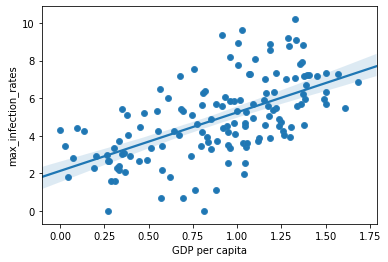

In [24]:
# max infection rates && GDP per capita
sns.scatterplot(Gdp_per_capita,np.log(m_inf_rates))
sns.regplot(Gdp_per_capita,np.log(m_inf_rates))

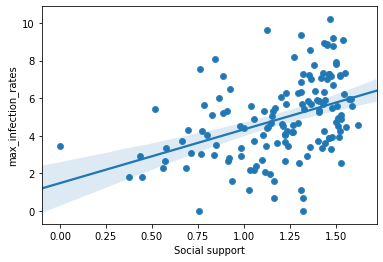

In [25]:
# max infection rates && Social support
sns.scatterplot(Social_support,np.log(m_inf_rates))
sns.regplot(Social_support,np.log(m_inf_rates))

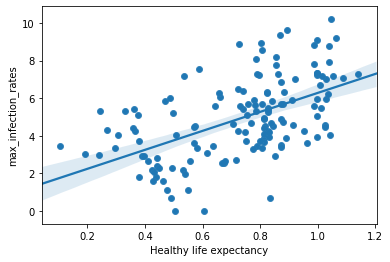

In [26]:
# max infection rates && Healthy life expectancy
sns.scatterplot(Healthy_life_expectancy,np.log(m_inf_rates))
sns.regplot(Healthy_life_expectancy,np.log(m_inf_rates))

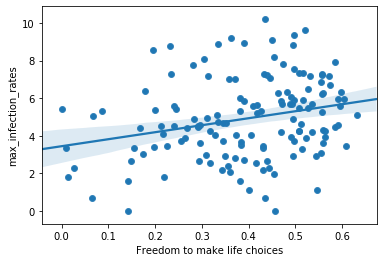

In [27]:
# max infection rates && Freedom to make life choices
sns.scatterplot(Freedom_life_choices,np.log(m_inf_rates))
sns.regplot(Freedom_life_choices,np.log(m_inf_rates))

# Conclusion : 
### developed countries with good life factors have higher rates of infection, and are more likely to be infected.

# Curves of all the countries for the covid19 dataset

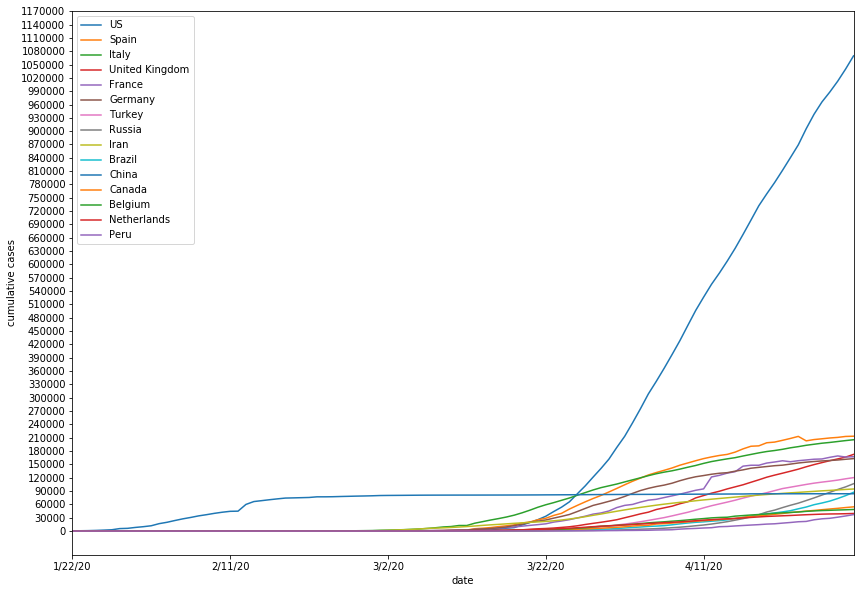

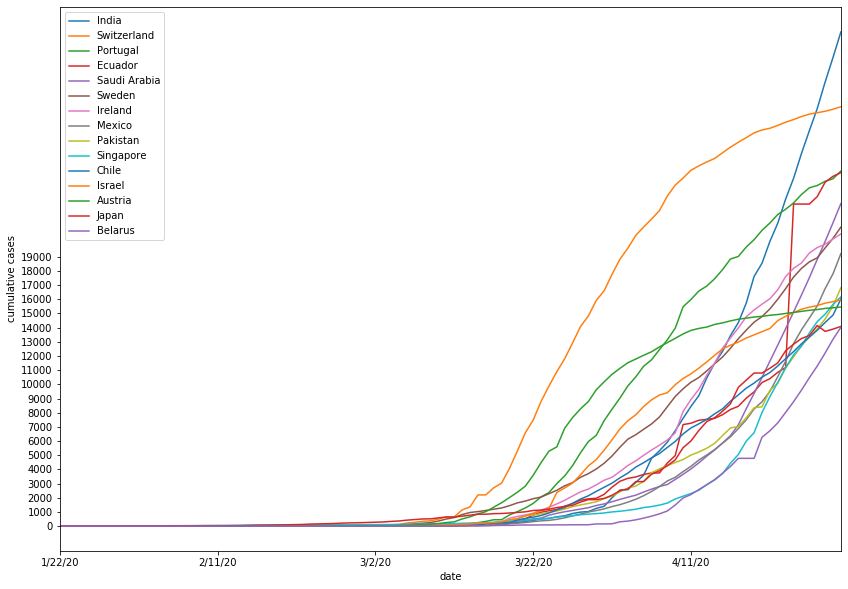

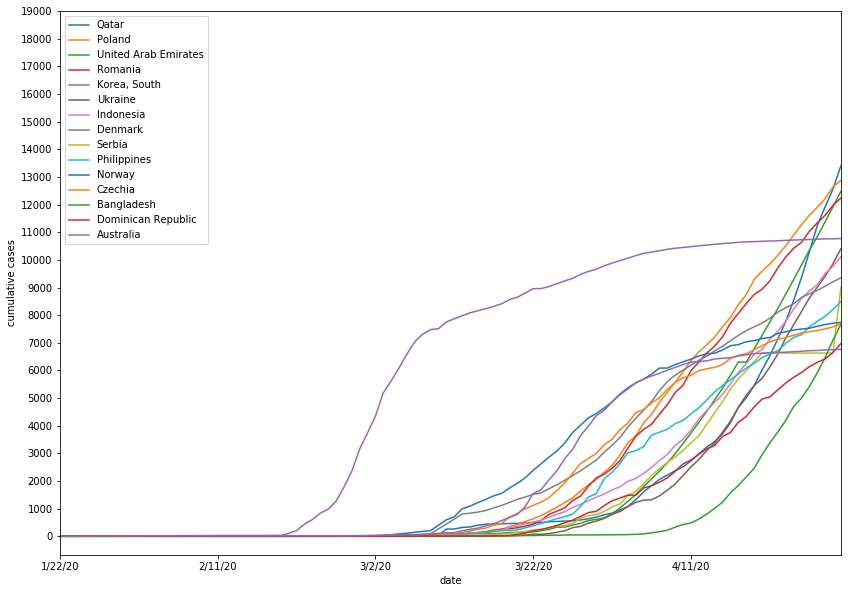

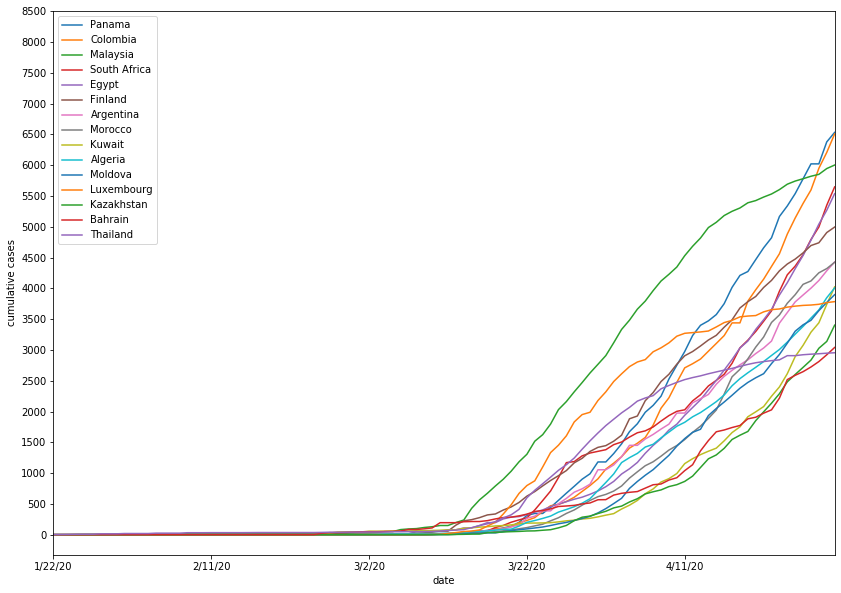

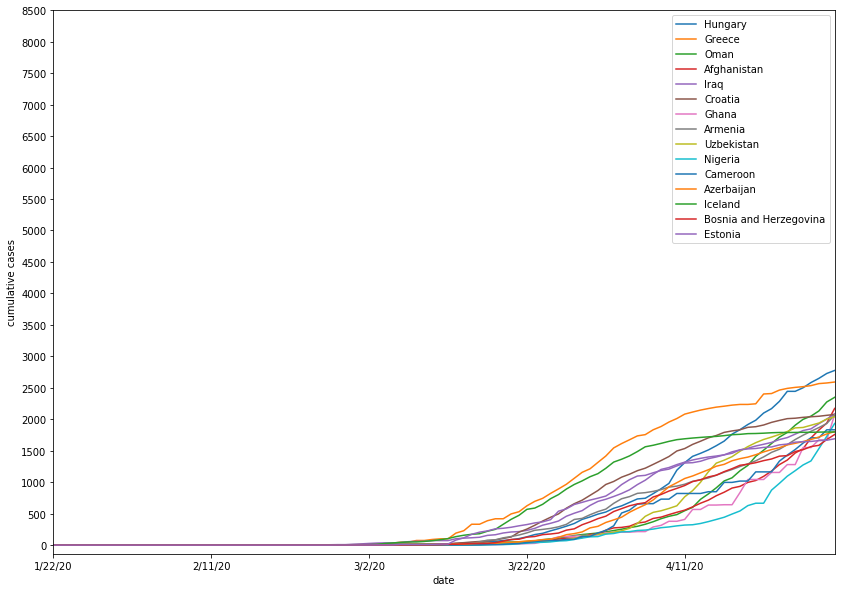

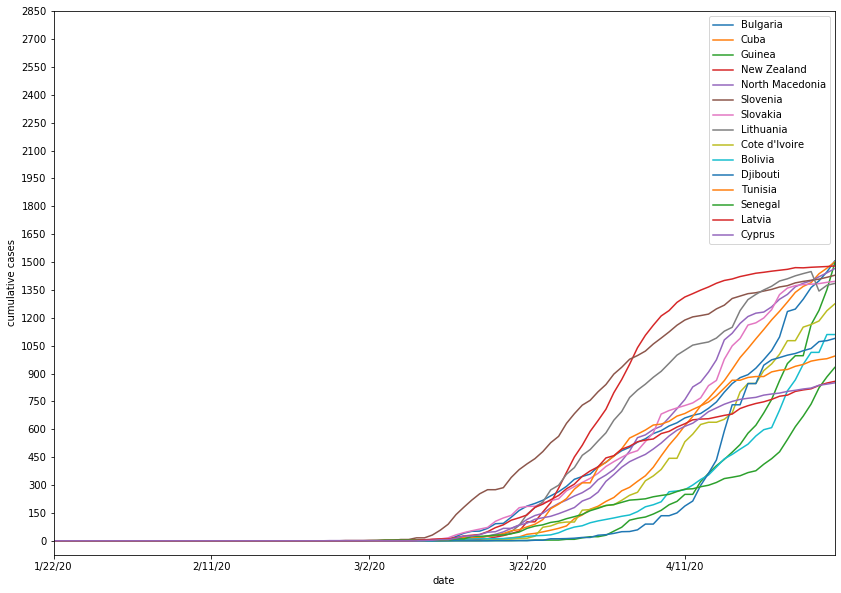

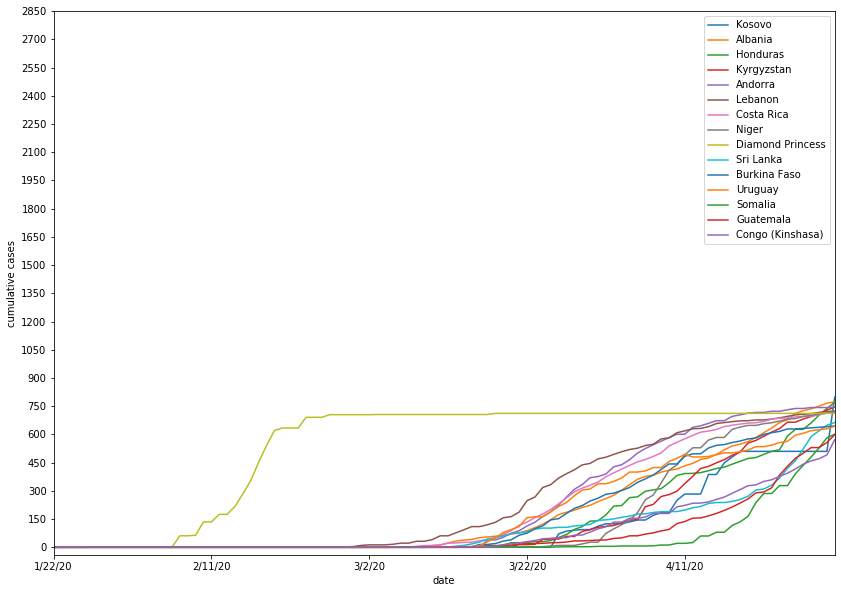

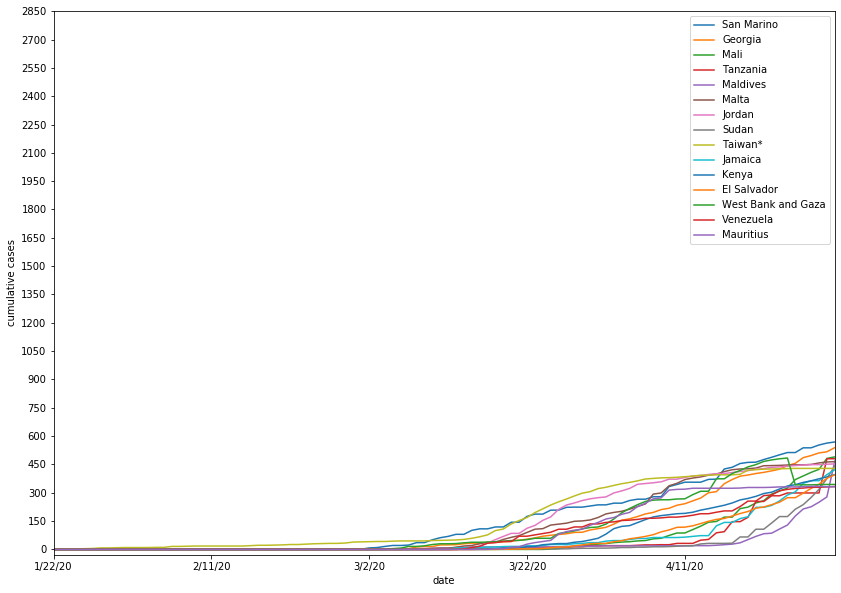

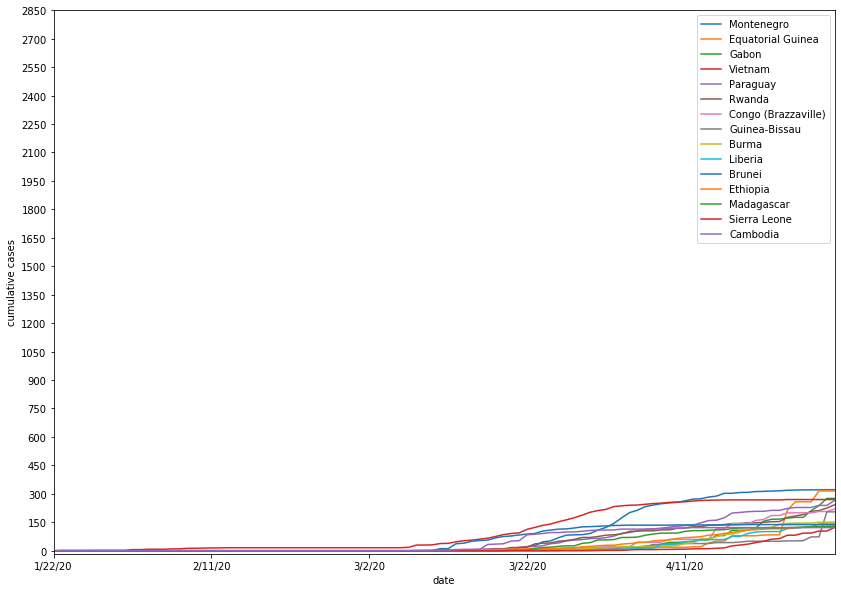

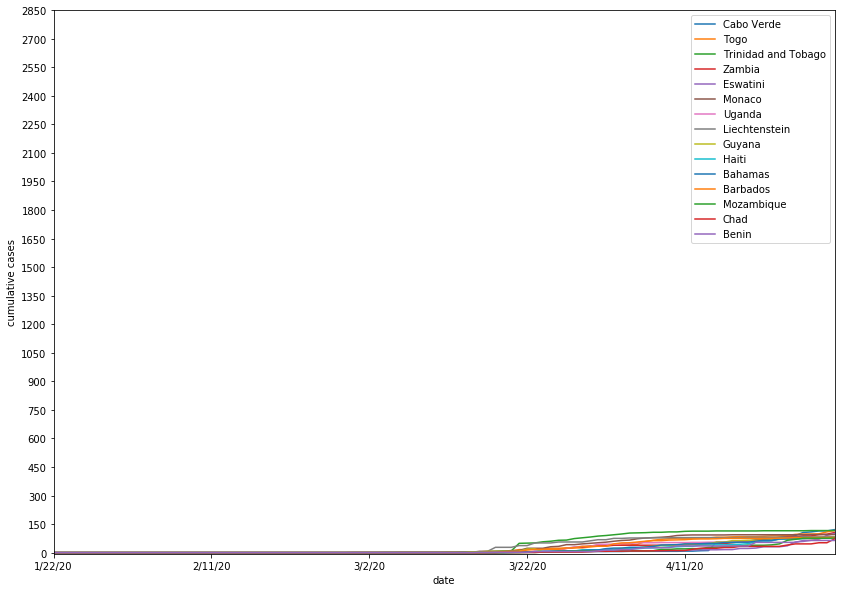

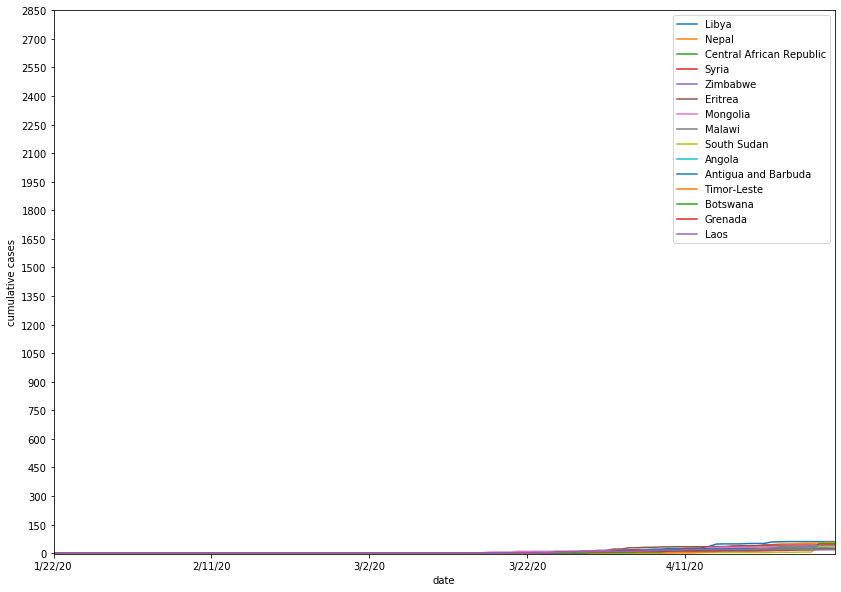

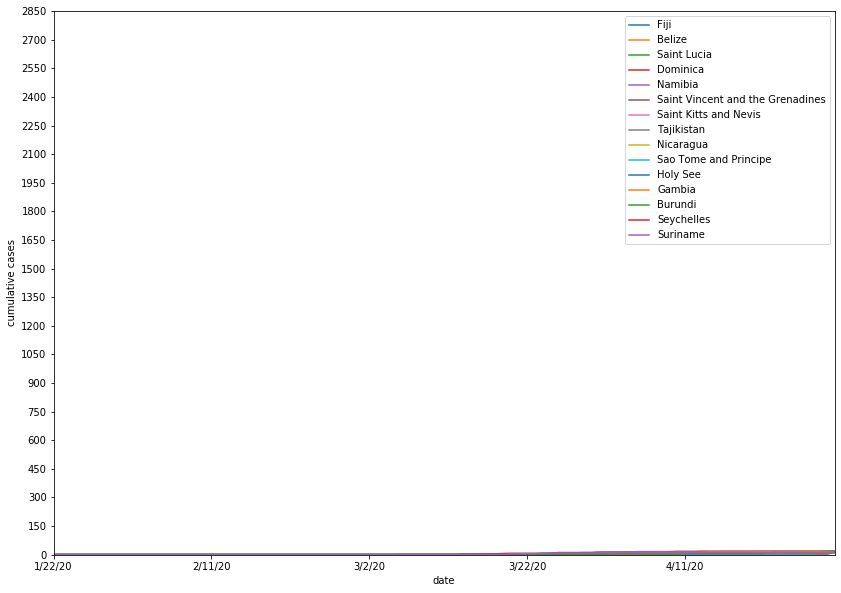

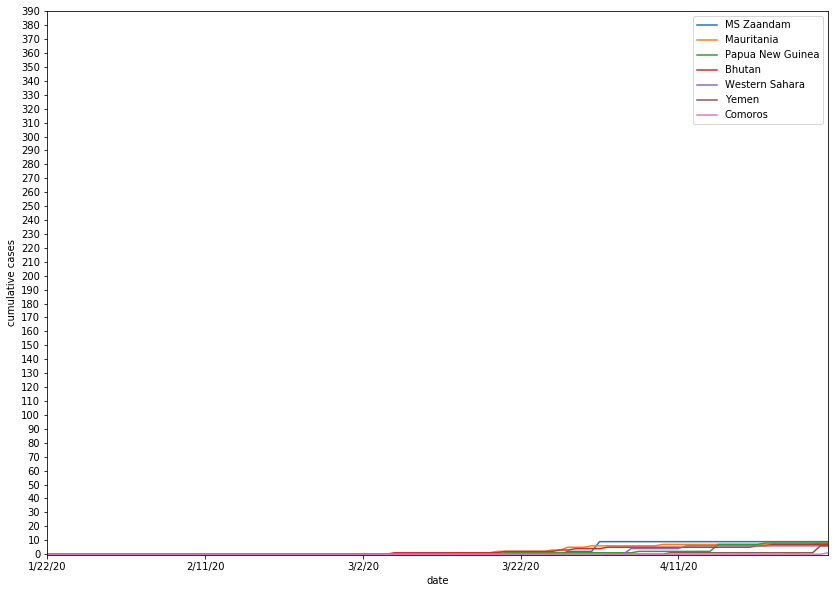

In [28]:
# create new dataset without max infection rates :: 
new_all_covid_dataset = covid_dataset_agg.drop(["max_infection_rates"],axis=1)
names = list(covid_dataset_agg.index[:])
nb_curves = 15
nb = len(names)//nb_curves if(len(names) % nb_curves == 0) else len(names)//nb_curves + 1
bias = 0
for i in range(nb - 1):
    plt.figure(figsize=(14,10))
    for e in range(nb_curves):
        ax = new_all_covid_dataset.loc[names[e+bias]].plot()
    bias += nb_curves 
    ax.set_xlabel('date')
    ax.set_ylabel('cumulative cases')
    # if statements for better visualization of the curves 
    if(i == 0):
        ax.set_yticks(np.arange(0,1200000,30000))
    elif(i == 1 or i == 2):
        ax.set_yticks(np.arange(0,20000,1000))
    elif(i > 2 and i < 5):
        ax.set_yticks(np.arange(0,9000,500))
    else:
        ax.set_yticks(np.arange(0,3000,150))
    plt.legend(fontsize='medium')
for i in range(1):
    plt.figure(figsize=(14,10))
    for e in range(len(names)%nb_curves):
        ax = new_all_covid_dataset.loc[names[e+bias]].plot() 
    ax.set_xlabel('date')
    ax.set_ylabel('cumulative cases')
    ax.set_yticks(np.arange(0,400,10))
    plt.legend(fontsize='medium')

## More about the merged dataset

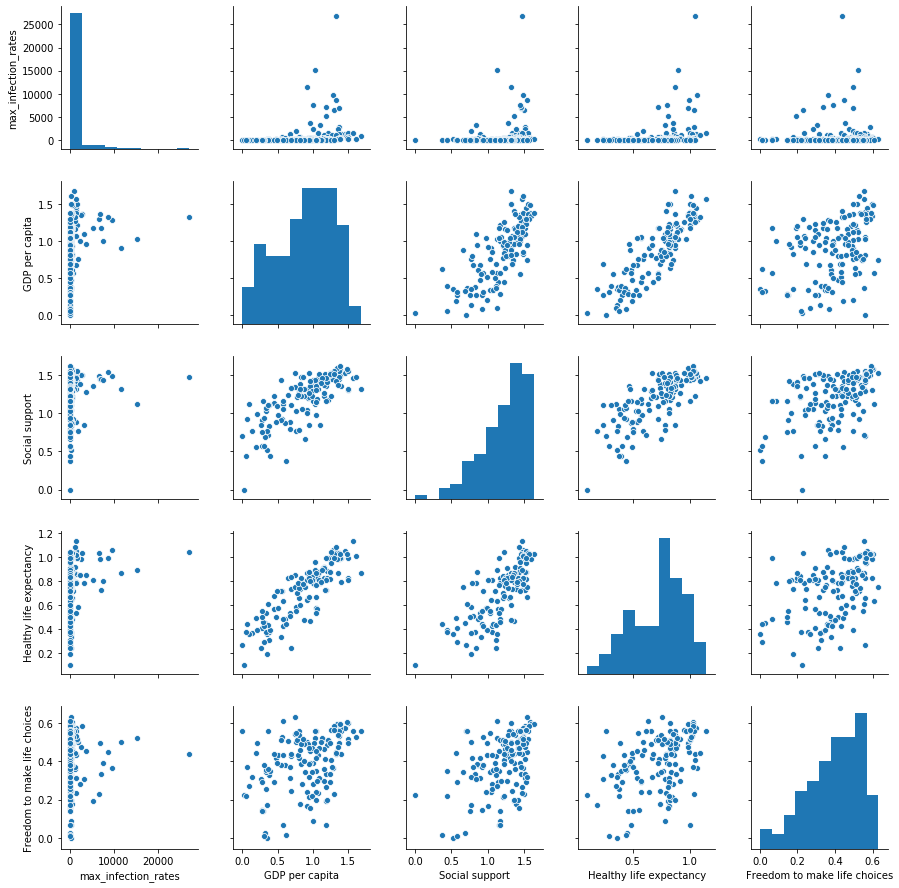

In [29]:
sns.pairplot(merged_dataset)

In [ ]:
"""
Created on Wednesday June 8 2020

@uthor : Mehenna
"""